<a href="https://colab.research.google.com/github/cantbelieveimshook/My-stuff-I-guess/blob/main/Autoencoder_benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import keras
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Conv2DTranspose
from tensorflow.keras.utils import  plot_model
from keras.preprocessing.image import ImageDataGenerator
import h5py
import io
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pickle
from scipy.stats import norm
from keras.constraints import UnitNorm, Constraint

In [ ]:
# filepath = '/content/drive/MyDrive/Big Data REU 2022 Team 1/REU 2022 Research/Datasets/newly_organized_pngs/'
filepath = '/content/drive/MyDrive/Big Data REU 2022 Team 1/REU 2022 Research/Datasets/new-test-data_Seraj/fft-denoised/'
os.chdir(filepath)

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255
        )

train = train_datagen.flow_from_directory(
        filepath + "train/",
        target_size=(256, 256),
        batch_size=32,
        color_mode = 'rgb',
        class_mode='binary',
        shuffle=False
    )

val = train_datagen.flow_from_directory(
        filepath + "validation/",
        target_size=(256, 256),
        batch_size=32,
        color_mode = 'rgb',
        class_mode='binary',
        shuffle=False
    )

test = train_datagen.flow_from_directory(
        filepath + "test/",
        target_size=(256, 256),
        batch_size=32,
        color_mode = 'rgb',
        class_mode='binary',
        shuffle=False
    )


Found 710 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 236 images belonging to 2 classes.


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
              0           1           2           3           4           5    \
count  256.000000  256.000000  256.000000  256.000000  256.000000  256.000000   
mean     0.469501    0.305607    0.264384    0.253186    0.283487    0.301302   
std      0.089617    0.091355    0.083756    0.072862    0.069089    0.071022   
min      0.278431    0.129412    0.094118    0.090196    0.101961    0.121569   
25%      0.406863    0.247059    0.207843    0.207843    0.242157    0.254902   
50%      0.462745    0.298039    0.260784    0.247059    0.280392    0.305882   
75%      0.514706    0.345098    0.305882    0.286275    0.317647    0.341176   
max      0.780392    0.631373    0.576471    0.533333    0.517647    0.537255   

              6           7           8           9    ...         246  \
count  256.000000  256.000000  256.000000  256.000000  ...  256.000000   
mean     0.311566    0.

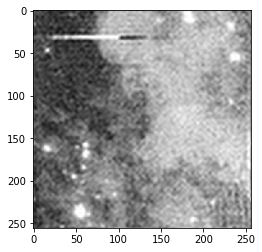

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
for images, labels in train:
  print( labels )
  print( pd.DataFrame(images[0].mean(axis=-1)).describe() )
  plt.imshow(images[0])
  break

In [ ]:
autoencoder = models.Sequential()
autoencoder.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape = (256, 256, 3), kernel_regularizer = keras.regularizers.l2(l = 0.01)))
autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same', kernel_regularizer = keras.regularizers.l2(l = 0.01)))
autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(keras.layers.Flatten())
autoencoder.add(keras.layers.Dense(64, activation='relu'))
autoencoder.add(keras.layers.Dropout(0.3))
autoencoder.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
autoencoder.compile(
        optimizer='Adam',
        metrics=['accuracy'],
        loss='binary_crossentropy')

In [ ]:
epochs = 100

h = autoencoder.fit(
    train,
    epochs=epochs,
    validation_data=val,
    verbose=1)

Epoch 1/100
23/23 [==============================] - 345s 14s/step - loss: 0.8639 - accuracy: 0.4324 - val_loss: 0.8346 - val_accuracy: 0.4929
Epoch 2/100
23/23 [==============================] - 17s 739ms/step - loss: 0.8258 - accuracy: 0.4930 - val_loss: 0.8167 - val_accuracy: 0.5000
Epoch 3/100
23/23 [==============================] - 19s 821ms/step - loss: 0.8095 - accuracy: 0.5000 - val_loss: 0.8021 - val_accuracy: 0.5000
Epoch 4/100
23/23 [==============================] - 17s 737ms/step - loss: 0.7965 - accuracy: 0.5000 - val_loss: 0.7905 - val_accuracy: 0.5000
Epoch 5/100
23/23 [==============================] - 17s 732ms/step - loss: 0.7861 - accuracy: 0.5000 - val_loss: 0.7813 - val_accuracy: 0.5000
Epoch 6/100
23/23 [==============================] - 17s 760ms/step - loss: 0.7779 - accuracy: 0.5000 - val_loss: 0.7739 - val_accuracy: 0.5000
Epoch 7/100
23/23 [==============================] - 17s 727ms/step - loss: 0.7711 - accuracy: 0.5000 - val_loss: 0.7677 - val_accuracy: 

In [ ]:
print("Average training accuracy: ",sum(h.history['accuracy'])/100)
print("Average training loss: ",sum(h.history['loss'])/100)
print("Average validation accuracy: ",sum(h.history['val_accuracy'])/100)
print("Average validation loss: ",sum(h.history['val_loss'])/100)

Average training accuracy:  0.4993999996781349
Average training loss:  1.6892051362991334
Average validation accuracy:  0.4993333330750465
Average validation loss:  0.8969045370817185


In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Training and Validation Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

NameError: ignored

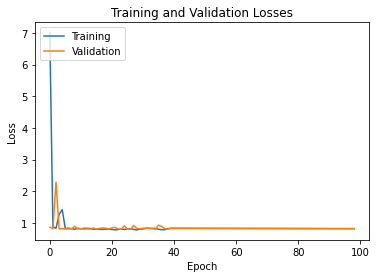

In [ ]:
plt.plot(h.history['loss'][1:])
plt.plot(h.history['val_loss'][1:])
plt.title('Training and Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
_, acc = autoencoder.evaluate(test, verbose = 0)
print('> %.3f' % (acc * 100))

> 50.000


In [ ]:
import sklearn.metrics as metrics


pred = autoencoder.predict(val)

print("Confusion Matrix: \n")
true_classes = val.classes
class_labels = list(val.class_indices.keys())
pred = np.round(pred)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=pred)
confusion_matrix


Confusion Matrix: 



array([[ 0, 30],
       [ 0, 30]])